# Dataset collection

In [ ]:
!git clone https://github.com/imdadulhaque1/papaya.git

Cloning into 'papaya'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 266 (delta 35), reused 241 (delta 20), pack-reused 0
Receiving objects: 100% (266/266), 9.10 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (35/35), done.


# `Remove the unzip file`

In [ ]:
#rm -rf papaya

# Imported needed packages

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

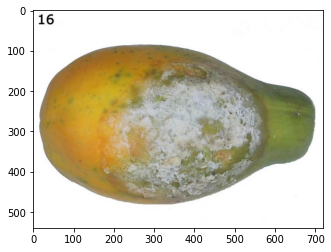

In [ ]:
img= image.load_img("papaya/training/disease/10.jpg")
plt.imshow(img)

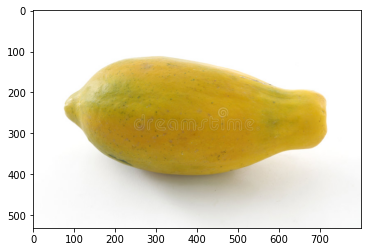

In [ ]:
img= image.load_img("papaya/training/fresh/15.jpg")
plt.imshow(img)

In [ ]:
#cv2.imread("papaya/training/disease/10.jpg")

In [ ]:
cv2.imread("papaya/training/disease/10.jpg").shape

(540, 720, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

# Train and Validation the Dataset

In [ ]:
train_dataset = train.flow_from_directory(
    'papaya/training/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')

validation_dataset = validation.flow_from_directory(
    'papaya/validation/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')

test_dataset = validation.flow_from_directory(
    'papaya/test/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')

Found 184 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


# Creating CNN model Using Keras API module

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    
                                    tf.keras.layers.Dense(1, activation='sigmoid'),   #softmax
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

# Compile the model

In [ ]:
model.compile(loss = 'binary_crossentropy',  #categorical_crossentropy
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

# Fit the model for Accuracy checking

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs= 100,
                      validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 2s 506ms/step - loss: 0.2143 - accuracy: 0.8889 - val_loss: 41.8692 - val_accuracy: 0.6786
Epoch 2/100
3/3 [==============================] - 1s 401ms/step - loss: 24.5631 - accuracy: 0.4286 - val_loss: 0.9837 - val_accuracy: 0.6786
Epoch 3/100
3/3 [==============================] - 1s 480ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 4.6508 - val_accuracy: 0.6786
Epoch 4/100
3/3 [==============================] - 1s 454ms/step - loss: 1.7959 - accuracy: 0.7778 - val_loss: 0.6540 - val_accuracy: 0.7143
Epoch 5/100
3/3 [==============================] - 1s 471ms/step - loss: 0.9697 - accuracy: 0.3333 - val_loss: 0.6453 - val_accuracy: 0.8214
Epoch 6/100
3/3 [==============================] - 2s 511ms/step - loss: 0.7528 - accuracy: 0.7778 - val_loss: 0.6230 - val_accuracy: 0.6786
Epoch 7/100
3/3 [==============================] - 1s 489ms/step - loss: 0.4348 - accuracy: 0.8889 - val_loss: 2.4719 - val_accuracy: 0.6786
Epoch 8/100

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

7/7 [==============================] - 0s 51ms/step - loss: 0.2765 - accuracy: 0.9524
Accuracy: 0.9523809552192688
Loss: 0.2765252888202667


In [ ]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Graph

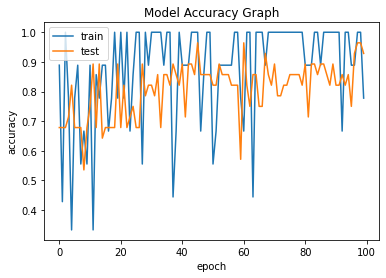

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title("Model Accuracy Graph")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Graph

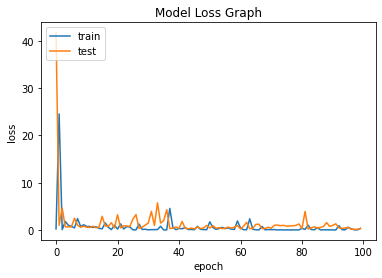

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title("Model Loss Graph")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
validation_dataset.class_indices

{'disease': 0, 'fresh': 1}

# Testing the dataset

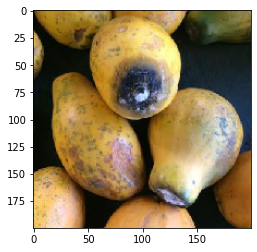

Disease affected Papaya !


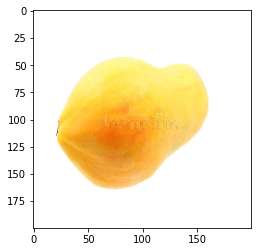

Fresh Papaya !


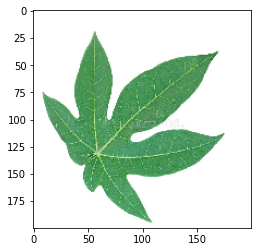

Fresh Papaya !


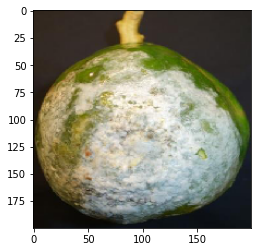

Disease affected Papaya !


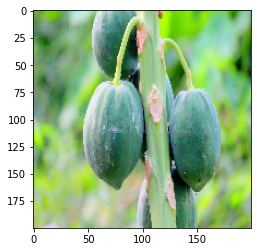

Fresh Papaya !


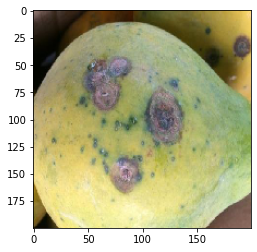

Disease affected Papaya !


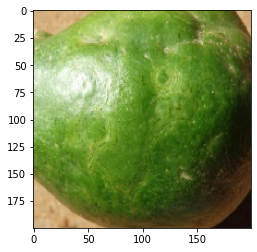

Fresh Papaya !


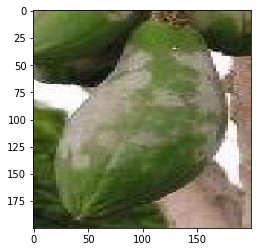

Disease affected Papaya !


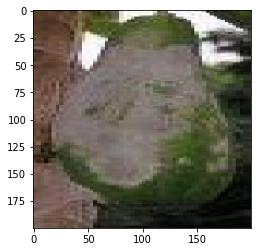

Disease affected Papaya !


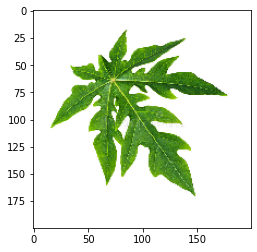

Fresh Papaya !


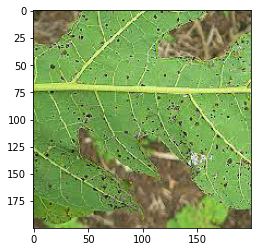

Fresh Papaya !


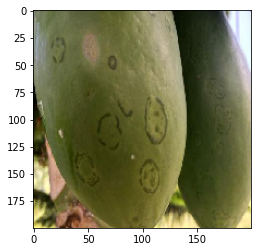

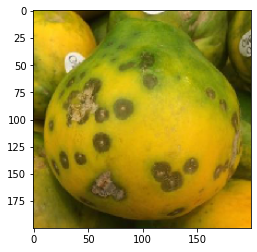

Disease affected Papaya !


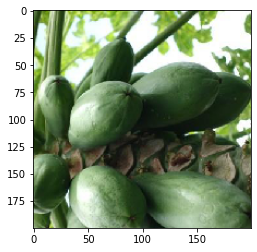

Disease affected Papaya !


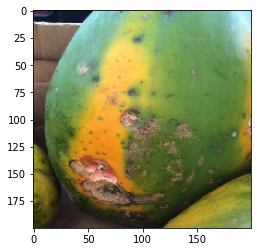

Disease affected Papaya !


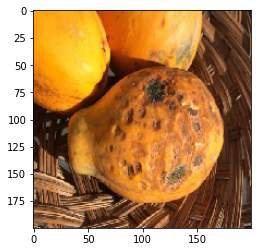

Disease affected Papaya !


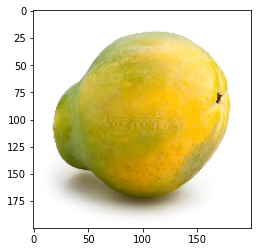

Fresh Papaya !


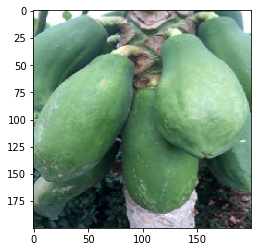

Disease affected Papaya !


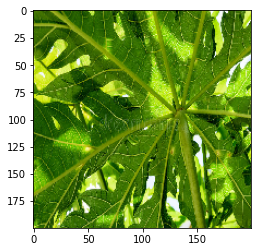

Fresh Papaya !


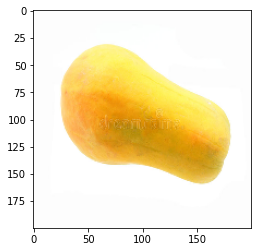

Fresh Papaya !


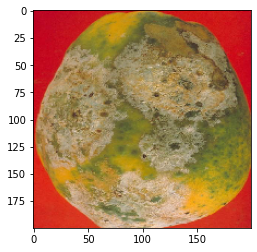

Disease affected Papaya !


In [ ]:
dir_path = 'papaya/testing'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"//"+i, target_size=(200,200,3))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("Disease affected Papaya !")
  elif val == 1:
    print("Fresh Papaya !")